# **Week 1 Starting with Neural Networks:Basic Classification**

#### **Exo1**

*Open a new notebook in GoogleColab for python3: https://colab.
research.google.com. Name your file as “firstname lasttime week1.ipynb”.
Run the following code for activating tensorflow version 2.0:*

In [1]:
try :
  # % tensorflow_version only exists in Colab .
  % tensorflow_version 2.x
except Exception :
  pass


#### **Exo2**

In [2]:
from __future__ import absolute_import , division , print_function , unicode_literals

# TensorFlow and tf. keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib . pyplot as plt

#### **Exo3**

In [3]:
print ( tf.__version__ )

2.4.1


#### **Exo4**

In [4]:
data = keras . datasets . cifar10
cifar10_data = data . load_data ()

170500096/170498071 [==============================] - 11s 0us/step


#### **Exo5**

In [5]:
type(cifar10_data)

tuple

In [6]:
len(cifar10_data)

2

#### **Exo6**

In [7]:
( train_images , train_labels ) ,( test_images , test_labels ) = cifar10_data

#### **Exo7**

In [8]:
print ( train_images [0])
print ( train_images [0]. shape )

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
(32, 32, 3)


#### **Exo8**

In [9]:
class_names = [ 'airplane' , 'automobile' , 'bird' , 'cat' , 'deer', 'dog' , 'frog' , 'horse' , 'ship' , 'truck']

In [10]:
len(train_images)

50000

In [11]:
len(train_labels)

50000

In [12]:
len(test_images)

10000

In [13]:
len(test_labels)

10000

In [14]:
train_labels.shape

(50000, 1)

In [15]:
train_images.shape

(50000, 32, 32, 3)

In [16]:
test_images.shape

(10000, 32, 32, 3)

In [17]:
test_labels.shape

(10000, 1)

#### **Exo9**

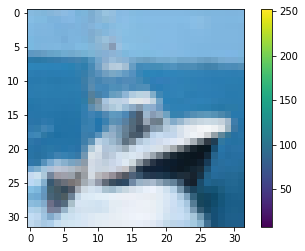

array([8], dtype=uint8)

In [18]:
index = 8
plt . figure ()
plt . imshow ( train_images [ index ])
plt . colorbar ()
plt . grid ( False )
plt . show ()

train_labels [ index ]

#### **Exo10**

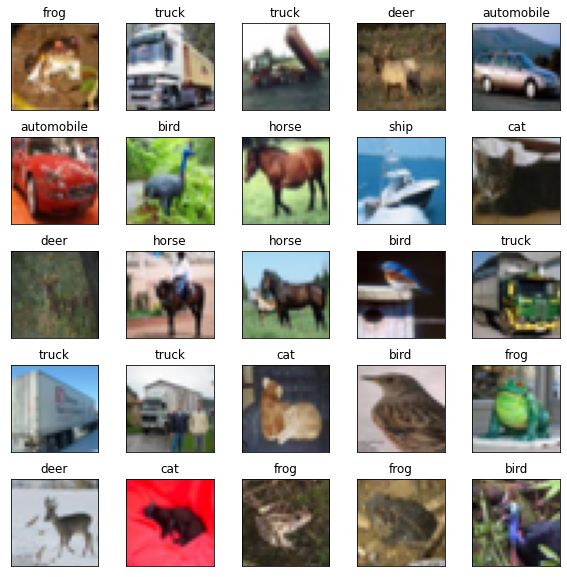

In [19]:
fig,axes = plt.subplots(5,5, gridspec_kw={'hspace': 0.3}, figsize=(10,10))
for index in range(25):
  axes[index//5,index%5].set_xticks([])
  axes[index//5,index%5].set_yticks([])
  axes[index//5,index%5].imshow(train_images[index])
  axes[index//5,index%5].grid(False)
  axes[index//5,index%5].set_title(class_names[train_labels[index][0]])
plt.show()


#### **Exo11**

In [20]:
train_images = train_images / 255.0
test_images = test_images/255.0

#### **Exo12**

## **What is a softmax ?**
 
**A softmax is a special output layer. The output of a neuron in this layer depends on the outputs of all the other neurons in its layer. 
This is because we require the sum of all the outputs to be equal to 1. It allows our output vector to be a probability distribution over a set of mutually exclusive labels instead of a binary response 0 or 1. 
Using a probability distribution gives us a better idea of how confident we are in our predictions.**

 ***Example :*** 
 
 



In [21]:
model = keras . Sequential ([
keras . layers . Flatten ( input_shape =(32 , 32 , 3) ) ,
keras . layers . Dense (128 , activation ='relu') ,
keras . layers . Dense (10 , activation ='softmax') ])

#### **Exo14**

In [22]:
model.compile ( optimizer ='adam',loss ='sparse_categorical_crossentropy', metrics =[ 'accuracy' ])

In [23]:
model . fit ( train_images , train_labels , epochs =10)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0302 - accuracy: 0.2702
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7732 - accuracy: 0.3674
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7070 - accuracy: 0.3899
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6718 - accuracy: 0.4063
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6537 - accuracy: 0.4079
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6461 - accuracy: 0.4123
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6294 - accuracy: 0.4175
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6138 - accuracy: 0.4209
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6051 - accuracy: 0.4275
Epoch 10/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.599

#### **Exo15**

In [24]:
test_loss , test_acc = model . evaluate ( test_images , test_labels ,verbose =2)

313/313 - 1s - loss: 1.6172 - accuracy: 0.4210


#### **Exo16**

In [25]:
predictions = model . predict ( test_images )


In [26]:
predictions[0]

array([0.04205602, 0.01520342, 0.19106448, 0.13793997, 0.16540591,
       0.09642576, 0.24699892, 0.02948276, 0.05997937, 0.01544341],
      dtype=float32)

In [27]:
predictions[1]

array([0.16106664, 0.14462142, 0.00853638, 0.00499548, 0.00114528,
       0.00342713, 0.00077341, 0.00251004, 0.15580305, 0.51712114],
      dtype=float32)

In [28]:
predictions[2]

array([1.9635627e-01, 1.2554184e-01, 4.5763054e-03, 2.5930728e-03,
       1.0658855e-03, 2.3655586e-03, 7.9439858e-05, 2.8604993e-03,
       4.4563767e-01, 2.1892348e-01], dtype=float32)

**Finally the predictions obtained in the Exe 16 are probabilities for each class name possible :**
 
 
**For the first prediction, the highest probability is 24.6% for the 7th name (the frog).**
**For the second prediction, the highest probability is 51.7% for the last name (the truck).**
**For the third prediction, the highest probability is 44.6% for the 9th name (the ship).**

In [29]:
np.argmax(predictions[0])

6

In [30]:
np.argmax(predictions[1])

9

In [31]:
np.argmax(predictions[2])

8

In [32]:
test_labels[0]

array([3], dtype=uint8)

In [33]:
test_labels[1]

array([8], dtype=uint8)

In [34]:
test_labels[2]

array([8], dtype=uint8)

First try : The 3 are corrects ! Then i reloaded everything and the model had the three wrong.. there is a part of randomness each time you reload the model, the predictions are different.

## **How to calculate the accuracy of our predictions ?**
 
 
**I put it in my notebook Week1 at the end of the Exe 16 :**


In [35]:
tru = 0
for index in range(len(predictions)):
  if(np.argmax(predictions[index])==test_labels[index][0]):
    tru+=1
print(tru/len(predictions))

0.421


**There, tru is the number of predictions made by the neural network that are actually accurate. 
To obtain the accuracy, I divide tru by the total number of predictions made.** 
 
**Finally I obtain an accuracy really close from the one displayed at the end of the training of the network :** 
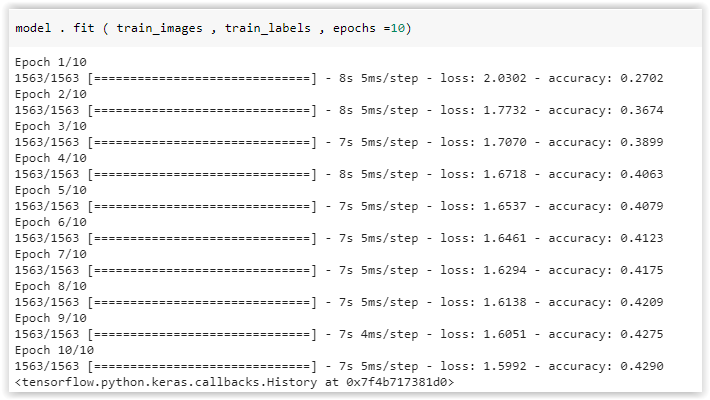

#### **Exo17**

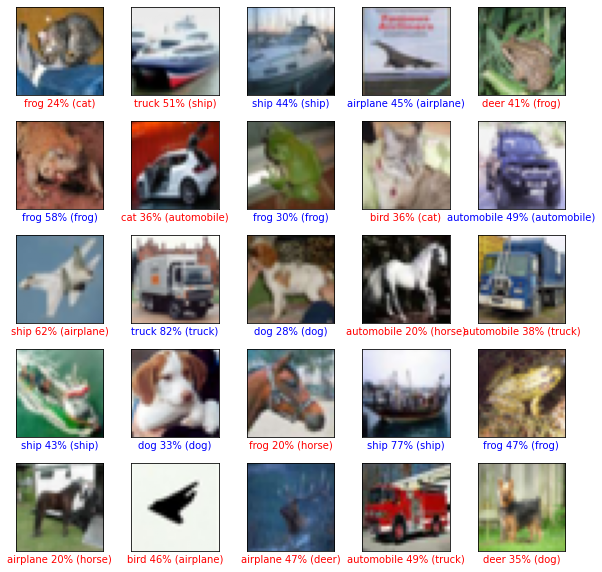

In [36]:
import math
fig,axes = plt.subplots(5,5, gridspec_kw={'hspace': 0.3}, figsize=(10,10))
for index in range(25):
  axes[index//5,index%5].set_xticks([] )
  axes[index//5,index%5].set_yticks([])

  axes[index//5,index%5].imshow(test_images[index])
  axes[index//5,index%5].grid(False)
  axes[index//5,index%5].set_xlabel(str(class_names[np.argmax(predictions[index])]) + ' ' + str(math.trunc(max(predictions[index])*100)) + '% (' + str(class_names[test_labels[index][0]]) + ')' )
  if (np.argmax(predictions[index])==test_labels[index][0]):
    axes[index//5,index%5].xaxis.label.set_color('blue')
  else:
    axes[index//5,index%5].xaxis.label.set_color('red')
plt.show()

#### **Exo18**

In [37]:
 y = np.expand_dims(test_images[5], axis=0)
 model.predict(y) 
 #expand dims()

array([[0.00664242, 0.0057721 , 0.07612415, 0.11872286, 0.04817682,
        0.10913627, 0.58152586, 0.033393  , 0.00081026, 0.01969625]],
      dtype=float32)

#### **Exo19**

*Let's try to play with the optimizer and the epochs size first*

In [38]:
model = keras . Sequential ([
keras . layers . Flatten ( input_shape =(32 , 32 , 3) ) ,
keras . layers . Dense (128 , activation ='relu') ,
keras . layers . Dense (10 , activation ='softmax') ])
model.compile ( optimizer ='SGD',loss ='sparse_categorical_crossentropy', metrics =[ 'accuracy' ])

In [39]:
model . fit ( train_images , train_labels , epochs =10)

Epoch 1/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9987 - accuracy: 0.2758
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.7415 - accuracy: 0.3840
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6614 - accuracy: 0.4163
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5945 - accuracy: 0.4373
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5601 - accuracy: 0.4525
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5270 - accuracy: 0.4628
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4954 - accuracy: 0.4720
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4685 - accuracy: 0.4846
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4456 - accuracy: 0.4931
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.431

In [40]:
model = keras . Sequential ([
keras . layers . Flatten ( input_shape =(32 , 32 , 3) ) ,
keras . layers . Dense (128 , activation ='relu') ,
keras . layers . Dense (10 , activation ='softmax') ])
model.compile ( optimizer ='RMSprop',loss ='sparse_categorical_crossentropy', metrics =[ 'accuracy' ])

In [41]:
32*32*3*128+128

393344

In [42]:
model.predict

<bound method Model.predict of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f4b6daf5940>>

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               393344    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 2.5027 - accuracy: 0.1013


[2.505018472671509, 0.1006999984383583]

In [45]:
model . fit ( train_images , train_labels , epochs =1)

1563/1563 [==============================] - 10s 6ms/step - loss: 1.9693 - accuracy: 0.2995


Available optimizers :


* SGD
* RMSprop
* Adam
* Adadelta
* Adagrad
* Adamax
* Nadam
* Ftrl


*Now let's modify the loss function*

In [46]:
model = keras . Sequential ([
keras . layers . Flatten ( input_shape =(32 , 32 , 3) ) ,
keras . layers . Dense (128 , activation ='relu') ,
keras . layers . Dense (10 , activation ='softmax') ])
model.compile ( optimizer ='SGD',loss ='Poisson', metrics =[ 'accuracy' ])

In [47]:
model . fit ( train_images , train_labels , epochs =10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 10.4975 - accuracy: 0.0986
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 10.4632 - accuracy: 0.0929
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 10.5092 - accuracy: 0.0938
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 10.4478 - accuracy: 0.0961
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 10.4572 - accuracy: 0.0979
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 10.4131 - accuracy: 0.0993
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 10.4545 - accuracy: 0.0965
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 10.4104 - accuracy: 0.1001
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 10.5222 - accuracy: 0.0963
Epoch 10/10
1563/1563 [==============================] - 7s 4ms/step - lo

*Let's change the activation softmax to softplus*

In [48]:
model = keras . Sequential ([
keras . layers . Flatten ( input_shape =(32 , 32 , 3) ) ,
keras . layers . Dense (128 , activation ='relu') ,
keras . layers . Dense (10 , activation ='softplus') ])
model.compile ( optimizer ='SGD',loss ='sparse_categorical_crossentropy', metrics =[ 'accuracy' ])
model . fit ( train_images , train_labels , epochs =10)

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 2.1027 - accuracy: 0.1633
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7720 - accuracy: 0.3745
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6848 - accuracy: 0.4051
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6209 - accuracy: 0.4275
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5787 - accuracy: 0.4459
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5515 - accuracy: 0.4505
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5209 - accuracy: 0.4620
Epoch 8/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.4961 - accuracy: 0.4707
Epoch 9/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4723 - accuracy: 0.4858
Epoch 10/10
1563/1563 [==============================] - 9s 6ms/step - loss: 1.450

#### **Exo20**